<a href="https://colab.research.google.com/github/emil565a/NLP/blob/main/NLP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets
!pip install sklearn
!pip3 install nltk
!pip3 install deep_translator

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 8.0 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.1 MB/s eta 0:00:00


In [2]:
import nltk

In [3]:
from datasets import load_dataset
import pandas as pd

dataset = load_dataset("copenlu/answerable_tydiqa")

# Also load dataset as pandas.DataFrame, in case we need it later
train_pd = pd.DataFrame(data=dataset["train"])
validation_pd = pd.DataFrame(data=dataset["validation"])

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/116067 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13325 [00:00<?, ? examples/s]

# Week 36

In [ ]:
train_set = dataset["train"]
validation_set = dataset["validation"]

## a) Familiarize yourself with the dataset

### Example Data
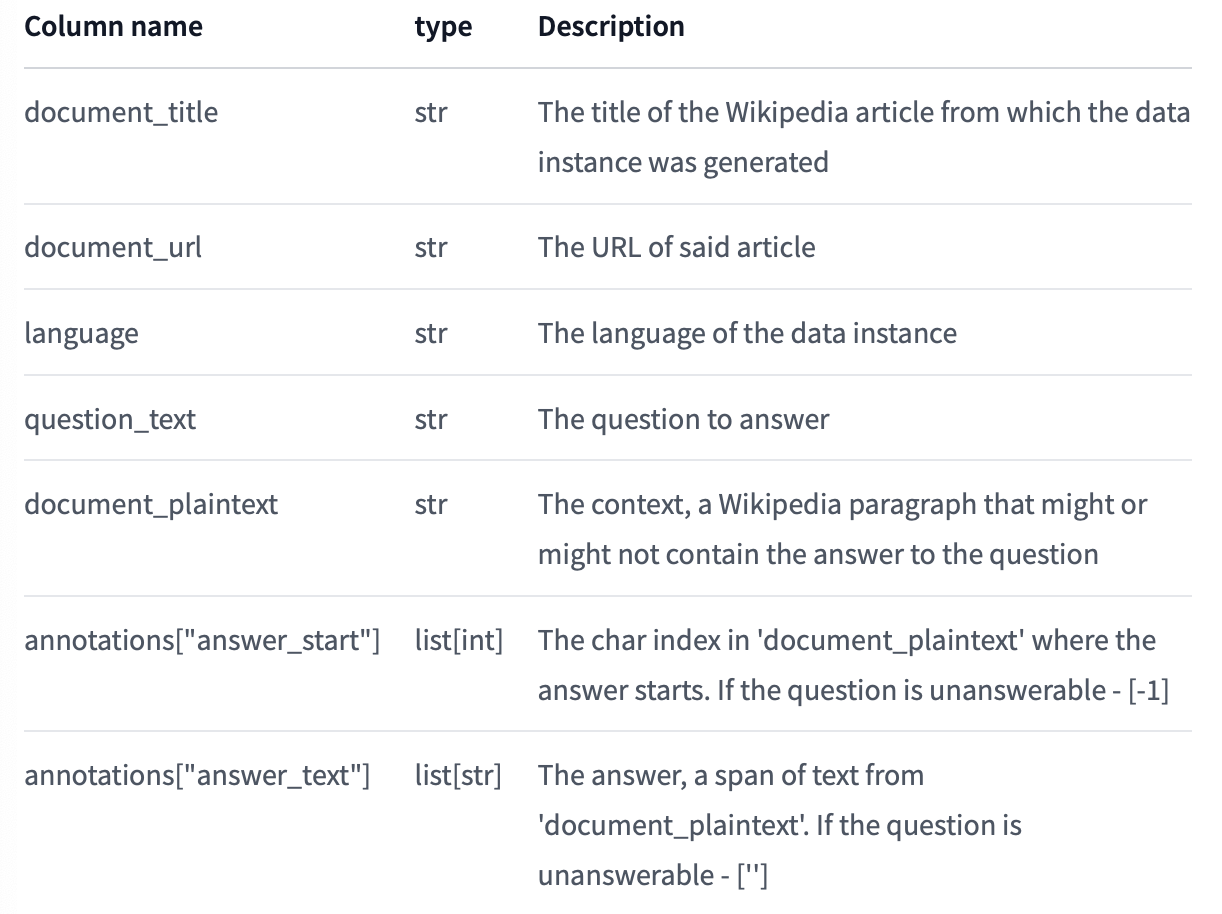

In [ ]:
#Emil
#Loading the datasets
arabic_train = [instance for instance in train_set if instance["language"] == "arabic"]
arabic_validation = [instance for instance in validation_set if instance["language"] == "arabic"]

bengali_train = [instance for instance in train_set if instance["language"] == "bengali"]
bengali_validation = [instance for instance in validation_set if instance["language"] == "bengali"]

indonesian_train = [instance for instance in train_set if instance["language"] == "indonesian"]
indonesian_validation = [instance for instance in validation_set if instance["language"] == "indonesian"]


In [ ]:
def get_statistics(data):
    to_return = {}
    to_return["per_language_count"] = data["language"].value_counts().to_dict()
    to_return["total_rows"] = data.shape[0]
    to_return["answer_count"] = sum([1 if x["answer_start"][0] != -1 else 0 for x in data["annotations"]])
    to_return["answer_percent"] = float(to_return["answer_count"]) / float(to_return["total_rows"])
    to_return["noanswer_count"] = to_return["total_rows"] - to_return["answer_count"]
    to_return["noanswer_percent"] = float(to_return["noanswer_count"]) / float(to_return["total_rows"])
    return to_return

def get_language_statistics(data, language="arabic"):
    to_return, subset = {}, data.loc[data["language"] == language]
    to_return["Num Questions/Documents (" + language + ")"] = subset.shape[0]
    to_return["Avg Question Length (" + language + ")"] = int(sum([len(x) for x in subset["question_text"]]) / subset.shape[0])
    to_return["Avg Document Length (" + language + ")"] = int(sum([len(x) for x in subset["document_plaintext"]]) / subset.shape[0])
    to_return["Answerable Questions (" + language + ")"] = sum([1 if x["answer_start"][0] != -1 else 0 for x in subset["annotations"]])
    to_return["Answerable Percent (" + language + ")"] = float(to_return["Answerable Questions (" + language + ")"]) / float(subset.shape[0])
    return to_return

# Print additional statistics from overall datasets (using pandas instances)
train_statistics = get_statistics(train_pd)
validation_statistics = get_statistics(validation_pd)

print("\n------ TRAINING DATA STATISTICS ------")
for key in train_statistics:
  print(key + ": " + str(train_statistics[key]))
for language in ["arabic", "bengali", "indonesian"]:
  print("\n------ LANGUAGE: " + language + " ------")
  language_statistics = get_language_statistics(train_pd, language=language)
  for key in language_statistics:
    print(key + ": " + str(language_statistics[key]))

print("\n----- VALIDATION DATA STATISTICS -----")
for key in validation_statistics:
  print(key + ": " + str(validation_statistics[key]))
for language in ["arabic", "bengali", "indonesian"]:
  print("\n------ LANGUAGE: " + language + " ------")
  language_statistics = get_language_statistics(validation_pd, language=language)
  for key in language_statistics:
    print(key + ": " + str(language_statistics[key]))


------ TRAINING DATA STATISTICS ------
per_language_count: {'arabic': 29598, 'finnish': 13701, 'russian': 12978, 'indonesian': 11394, 'telugu': 11117, 'japanese': 8778, 'thai': 7576, 'english': 7389, 'swahili': 5508, 'bengali': 4779, 'korean': 3249}
total_rows: 116067
answer_count: 58059
answer_percent: 0.5002197006901187
noanswer_count: 58008
noanswer_percent: 0.4997802993098814

------ LANGUAGE: arabic ------
Num Questions/Documents (arabic): 29598
Avg Question Length (arabic): 29
Avg Document Length (arabic): 474
Answerable Questions (arabic): 14805
Answerable Percent (arabic): 0.5002027163997568

------ LANGUAGE: bengali ------
Num Questions/Documents (bengali): 4779
Avg Question Length (bengali): 47
Avg Document Length (bengali): 554
Answerable Questions (bengali): 2390
Answerable Percent (bengali): 0.5001046243984097

------ LANGUAGE: indonesian ------
Num Questions/Documents (indonesian): 11394
Avg Question Length (indonesian): 36
Avg Document Length (indonesian): 529
Answerabl

## b) Most Common Words

In [ ]:
from collections import Counter
import nltk
from deep_translator import GoogleTranslator

nltk.download('punkt')

def five_most_common_words(train_set, language, document=True):
    target = "document_plaintext" if document else "question_text"
    language_train_set = [example for example in train_set if example["language"] == language]
    language_text = " ".join(example[target] for example in language_train_set)
    tokens = [word.lower() for word in nltk.word_tokenize(language_text) if word.isalpha()]
    word_counts = Counter(tokens)
    sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
    most_common_words = {word: count for word, count in sorted_words[:5]}
    return most_common_words

def commonWordsSorted(train_set, language):
    language_train_set = [example for example in train_set if example["language"] == language]
    language_text = " ".join(example["document_plaintext"] for example in language_train_set)
    tokens = [word.lower() for word in nltk.word_tokenize(language_text) if word.isalpha()]
    word_counts = Counter(tokens)
    sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
    return sorted_words

def translate_words(words, source_language, target_language):
    translations = {}
    translator = GoogleTranslator(source=source_language, target=target_language)
    for word in words:
        try:
            translated_word = translator.translate(word)
        except:
            translated_word = "Translation failed"
        translations[word] = translated_word
    return translations

# Arabic
most_common_words = five_most_common_words(arabic_train, "arabic")
most_common_words_q = five_most_common_words(arabic_train, "arabic", document=False)
translated_words = translate_words(list(most_common_words.keys()), source_language="arabic", target_language='en')
translated_words_q = translate_words(list(most_common_words_q.keys()), source_language="arabic", target_language='en')
print("Arabic (Documents):", most_common_words, translated_words)
print("Arabic (Questions):", most_common_words_q, translated_words_q)

# Bengali
most_common_words_bengali = five_most_common_words(bengali_train, "bengali")
most_common_words_bengali_q = five_most_common_words(bengali_train, "bengali", document=False)
translated_words_bengali = translate_words(list(most_common_words_bengali.keys()), source_language="bengali", target_language='en')
translated_words_bengali_q = translate_words(list(most_common_words_bengali_q.keys()), source_language="bengali", target_language='en')
print("Bengali (Documents):", most_common_words_bengali, translated_words_bengali)
print("Bengali (Questions):", most_common_words_bengali_q, translated_words_bengali_q)

# Indonesian
most_common_words_indonesian = five_most_common_words(indonesian_train, "indonesian")
most_common_words_indonesian_q = five_most_common_words(indonesian_train, "indonesian", document=False)
translated_words_indonesian = translate_words(list(most_common_words_indonesian.keys()), source_language="indonesian", target_language='en')
translated_words_indonesian_q = translate_words(list(most_common_words_indonesian_q.keys()), source_language="indonesian", target_language='en')
print("Indonesian (Documents):", most_common_words_indonesian, translated_words_indonesian)
print("Indonesian (Questions):", most_common_words_indonesian_q, translated_words_indonesian_q)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Arabic (Documents): {'في': 89705, 'من': 61719, 'على': 28062, 'إلى': 22088, 'تصنيف': 15655} {'في': 'in', 'من': 'from', 'على': 'on', 'إلى': 'to', 'تصنيف': 'classification'}
Arabic (Questions): {'ما': 7451, 'متى': 7130, 'هو': 6760, 'من': 6309, 'في': 4152} {'ما': 'what', 'متى': 'when', 'هو': 'he', 'من': 'from', 'في': 'in'}
Bengali (Documents): {'ও': 5195, 'এই': 3351, 'এর': 1557, 'পর': 935, 'এক': 884} {'ও': 'And', 'এই': 'this', 'এর': 'of', 'পর': 'after', 'এক': 'one'}
Bengali (Questions): {'কত': 802, 'হয়': 800, 'শহর': 74, 'সদর': 68, 'আয়তন': 62} {'কত': 'how much', 'হয়': 'is', 'শহর': 'the city', 'সদর': 'headquarters', 'আয়তন': 'volume'}
Indonesian (Documents): {'yang': 24411, 'dan': 23949, 'di': 17537, 'pada': 11024, 'dari': 10062} {'yang': 'Which', 'dan': 'And', 'di': 'in', 'pada': 'on', 'dari': 'from'}
Indonesian (Questions): {'apakah': 2007, 'kapan': 1843, 'yang': 1822, 'apa': 1774, 'pertama': 1132} {'apakah': 'is', 'kapan': 'When', 'yang': 'Which', 'apa': 'What', 'pertama': 'First'}


## c) Oracle Function

In [ ]:
#Implement an “oracle” function that indicates whether a
#question is an- swerable or not given the document and answer.
#That is, the function will output 1 if the answer to the question
#appears in the document and 0 otherwise.

def oracle_function(instance):
  if instance["annotations"]["answer_start"] != [-1]:
    return 1
  return 0

In [ ]:
arabicWordsFreqSorted = commonWordsSorted(arabic_train, "arabic")
bengaliWordsFreqSorted = commonWordsSorted(bengali_train, "bengali")
indonesianWordsFreqSorted = commonWordsSorted(indonesian_train, "indonesian")
arabicWordsDict = dict(arabicWordsFreqSorted)
bengaliWordsDict = dict(bengaliWordsFreqSorted)
indonesianWordsDict = dict(indonesianWordsFreqSorted)


In [ ]:
#implement a rule-based classifier that predicts
#whether a question is answerable only using the document and question.

#Emil Version
def ruleBasedClassifierE(document, CorpusWordFreuency):
  plainText = document["document_plaintext"]
  question = document["question_text"]
  tokenizedPlainText = nltk.word_tokenize(plainText)
  tokenizedQuestion = nltk.word_tokenize(question)

  #Sort the tokens of the question words by uncommenness in the corpus
  #If token is not in the corpus, add it to corpusWordsDict, give it a count of 1
  for word in tokenizedQuestion:
    if word not in CorpusWordFreuency:
      CorpusWordFreuency[word] = 1

  sortedQuestionTokens = sorted(tokenizedQuestion, key=lambda x: CorpusWordFreuency[x], reverse=True)

  #Get the 50% most uncommon words of the question
  mostUncommonWords = sortedQuestionTokens[:int(len(sortedQuestionTokens)*0.5)]

  for word in mostUncommonWords:
    if word in tokenizedPlainText:
      return 1
  return 0

def evaluate(trainSet, sortedWords):
    correct = 0
    for instance in trainSet:
        if ruleBasedClassifierE(instance, sortedWords) == oracle_function(instance):
            correct += 1
    return correct/len(trainSet)




print("Accuracy: " + str(evaluate(arabic_train, arabicWordsDict)))
print("Accuracy: " + str(evaluate(bengali_train, bengaliWordsDict)))
print("Accuracy: " + str(evaluate(indonesian_train, indonesianWordsDict)))


Accuracy: 0.6751807554564497
Accuracy: 0.6865453023645114
Accuracy: 0.6758820431806214


In [ ]:
# Chris' Rule-based Classifier Method
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

def rule_based_classifier(document: str, question: str) -> bool:
    # RULE 1: If the question contains any words in the documents (minus the 1% most-common terms)
    # it is considered "answerable" (otherwise "unanswerable")
    # Determine the frequency of words in the document/question
    document_word_rankings = dict(FreqDist((word_tokenize(document))))
    document_word_rankings = sorted(list(document_word_rankings.items()), key=lambda x: x[1])
    question_word_rankings = dict(FreqDist((word_tokenize(question))))

    # Check rule to determine if question is "answerable"
    to_pass, to_check = 0, int(len(document_word_rankings)*0.99)
    required_pass = 1
    for word, _ in document_word_rankings[:to_check]:
        if word in question_word_rankings:
            to_pass += 1
        if to_pass >= required_pass:
           return True
    return False

# Calculate accuracy and print, LONG OPERATION!
for dataset in [arabic_train, bengali_train, indonesian_train]:
    accuracy = sum([1 if oracle_function(x) == rule_based_classifier(x["document_plaintext"], x["question_text"]) else 0
                    for x in arabic_train]) / len(arabic_train)
    print(accuracy) # it's around 60-70% lmao

0.6705182782620447
0.6705182782620447
0.6705182782620447


In [ ]:

def word_in_document_check(document):
    '''Checks if the words of the question is in the document.'''
    question = document["question_text"]
    document_text = document["document_plaintext"]

    for word in nltk.word_tokenize(question):
        if word in nltk.word_tokenize(document_text):
            return 1

    return 0

def word_in_title_and_document_check(document):
    '''Checks if the words of the question is in the title and the document.'''
    question = document["question_text"]
    document_text = document["document_plaintext"]
    title = document["document_title"]

    for word in nltk.word_tokenize(question):
        if word in nltk.word_tokenize(document_text) and word in nltk.word_tokenize(title):
            return 1

    return 0

def word_in_title_or_document_check(document):
    '''Checks if the words of the question is in the title or the document.'''
    question = document["question_text"]
    document_text = document["document_plaintext"]
    title = document["document_title"]

    for word in nltk.word_tokenize(question):
        if word in nltk.word_tokenize(document_text) or word in nltk.word_tokenize(title):
            return 1

    return 0

In [ ]:
def evaluate_classifier(dataset, classifier):
    correct = 0
    for instance in dataset:
        if classifier(instance) == oracle_function(instance):
            correct += 1

    return correct / len(dataset)

print("word_in_document_check accuracy on arabic train:     ", evaluate_classifier(arabic_train, word_in_document_check))
print("word_in_document_check accuracy on bengali train:    ", evaluate_classifier(bengali_train, word_in_document_check))
print("word_in_document_check accuracy on indonesian train: ", evaluate_classifier(indonesian_train, word_in_document_check))

word_in_document_check accuracy on arabic train:      0.6631529157375499
word_in_document_check accuracy on bengali train:     0.6792215944758317
word_in_document_check accuracy on indonesian train:  0.6408636124275935


# Week 37

In [ ]:
import nltk
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.lm import MLE
from nltk.lm import Laplace
from nltk.lm import Vocabulary
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Tokenization

In [ ]:
def tokenizer(text):
  #Tokenize the text and translate
  tokens = [word.lower() for word in nltk.word_tokenize(text)]
  return tokens

#Tokenizing training data
arabic_train_plain_tokenized = [tokenizer(x["document_plaintext"]) for x in arabic_train[0:5]]
arabic_train_question_tokenized = [tokenizer(x["question_text"]) for x in arabic_train[0:5]]
indonesian_train_plain_tokenized = [tokenizer(x["document_plaintext"]) for x in indonesian_train[0:5]]
indonesian_train_question_tokenized = [tokenizer(x["question_text"]) for x in indonesian_train[0:5]]
bengali_train_plain_tokenized = [tokenizer(x["document_plaintext"]) for x in bengali_train[0:5]]
bengali_train_question_tokenized = [tokenizer(x["question_text"]) for x in bengali_train[0:5]]



#Tokenizing validation data
arabic_validation_plain_tokenized = [tokenizer(x["document_plaintext"]) for x in arabic_validation[0:5]]
arabic_validation_question_tokenized = [tokenizer(x["question_text"]) for x in arabic_validation[0:5]]
indonesian_validation_plain_tokenized = [tokenizer(x["document_plaintext"]) for x in indonesian_validation[0:5]]
indonesian_validation_question_tokenized = [tokenizer(x["question_text"]) for x in indonesian_validation[0:5]]
bengali_validation_plain_tokenized = [tokenizer(x["document_plaintext"]) for x in bengali_validation[0:5]]
bengali_validation_question_tokenized = [tokenizer(x["question_text"]) for x in bengali_validation[0:5]]

### Emils Language Model

In [ ]:
#Inspired: https://ai.plainenglish.io/n-gram-and-its-use-in-text-generation-a3fbe96b2097
def create_laplace_language_model(tokens, n=2):
    #Add psudo counts to each event in the dataset.
    # Create N-grams and padded sequences
    train_data, padded_seq = padded_everygram_pipeline(n, tokens)

    # Initialize and train the Laplace language model
    laplace = Laplace(n)
    laplace.fit(train_data, padded_seq)

    return laplace

#Creating the models
#Arabic
laplace_arabic_plaintext = create_laplace_language_model(arabic_train_plain_tokenized, n=2)
laplce_arabic_question = create_laplace_language_model(arabic_train_question_tokenized, n=2)

#Indonesian
lapalce_indonesian_plaintext = create_laplace_language_model(indonesian_train_plain_tokenized, n=2)
laplace_indonesian_question = create_laplace_language_model(indonesian_train_question_tokenized, n=2)

#Bengali
laplace_bengali_plaintext = create_laplace_language_model(bengali_train_plain_tokenized, n=2)
laplace_bengali_question = create_laplace_language_model(bengali_train_question_tokenized, n=2)

### Performance (Perplexity, ...)

In [ ]:
allModels = [laplace_arabic_plaintext,
             laplce_arabic_question,
             lapalce_indonesian_plaintext,
             laplace_indonesian_question,
             laplace_bengali_plaintext,
             laplace_bengali_question]

allValidation = [arabic_validation_plain_tokenized,
                 arabic_validation_question_tokenized,
                 indonesian_validation_plain_tokenized,
                 indonesian_validation_question_tokenized,
                 bengali_validation_plain_tokenized,
                 bengali_validation_question_tokenized]

for model, validation in zip(allModels, allValidation):
    print("Accuracy: ", model.perplexity(validation))





Accuracy:  248.9999999999998
Accuracy:  29.000000000000014
Accuracy:  217.00000000000003
Accuracy:  27.999999999999993
Accuracy:  297.0000000000001
Accuracy:  33.0
